# Task 3: Approximating nonlinear vector fields

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load data sets
X0 = np.loadtxt(fname="nonlinear_vectorfield_data_x0.txt")
print('Shape of the nonlinear data set: '+str(np.shape(X0)))
X1 = np.loadtxt(fname="nonlinear_vectorfield_data_x1.txt")
print('Shape of the nonlinear data set: '+str(np.shape(X1)))

Shape of the nonlinear data set: (2000, 2)
Shape of the nonlinear data set: (2000, 2)


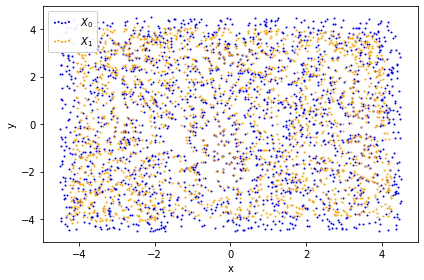

In [3]:
# plot both data sets
plt.scatter(X0[:,0], X0[:,1], c='blue', s=1, alpha=1)
plt.scatter(X1[:,0], X1[:,1], c='orange', s=1, alpha=1)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.legend(['$X_0$','$X_1$'], loc='upper left', scatterpoints=5, framealpha=0.9)
plt.show()

### First part: Approximation with linear function

In [4]:
# estimate vector field using finite differences
dt = 0.1
V = (X1-X0)/dt

In [5]:
# calculate AT such that X0 @ AT = V with least squares optimization
AT, _, _, _ = np.linalg.lstsq(X0, V, rcond=None)

In [6]:
# approximate vector field and data points
V_next = X0 @ AT
X_next = V_next * dt + X0 # approximates X1
X1_ap_lin = X_next # just renaming

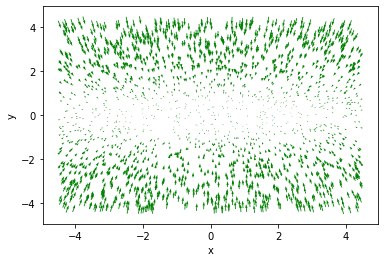

In [7]:
# plotting the vector field
plt.quiver(X0[:,0],X0[:,1],V_next[:,0],V_next[:,1], angles='xy', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

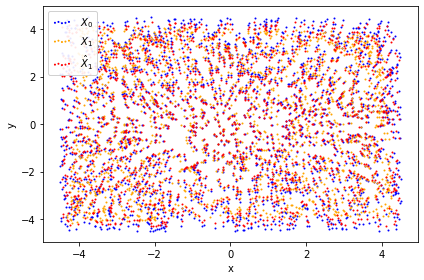

In [8]:
# plot both data sets and approximated x1
plt.scatter(X0[:,0], X0[:,1], c='blue', s=1, alpha=1)
plt.scatter(X1[:,0], X1[:,1], c='orange', s=1, alpha=1)
plt.scatter(X1_ap_lin[:,0], X1_ap_lin[:,1], c='red', s=1, alpha=1)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.legend(['$X_0$','$X_1$', '$\hat{X}_1$'], loc='upper left', scatterpoints=5, framealpha=0.9)
plt.show()

In [9]:
# calculate the mean squared error
MSE_lin = np.mean(X1 - X1_ap_lin)**2
print('MSE: %.18f'%(MSE_lin))

MSE: 0.000119949411095183


### Second part: Approximation with radial basis functions

In [10]:
def phi_xl(x, x_l, eps):
    '''
    Computes the value of radial basisfunction for x with given supporting point x_l
    --
    returns scalar value
    --
    Parameters:
        x: data point n-dim
        x_l: supporting point n-dim
        eps: parameter for the radial basis function
    '''
    assert np.shape(x) == np.shape(x_l), 'Shapes mismatch '+str(np.shape(x))+' and '+str(np.shape(x_l))
    distance = np.linalg.norm((x_l - x), 2)**2
    value = -distance/eps**2
    return np.exp(value)

In [11]:
def supporting_points(L, X):
    '''
    Selects L equally distributed supporting points out of X
    --
    returns array of length L
    --
    Parameters:
        L: number of supporting points
        X: array of data points
    '''
    N = np.shape(X)[0]
    d = N/L # 'index distance' between neighbouring supporting points
    sup_points = np.empty((L, np.shape(X)[1]))
    for l in range(L):
        sup_points[l] = X[round(l*d),:]
    return sup_points

In [12]:
def rbf(X, L, eps):
    '''
    Computes the values of the radial basis functions for given data points and number of supporting points
    --
    returns matrix Phi containing the rbf value for each pair of data point and supporting point
    --
    Parameters:
        X: data points
        L: number of suppoting points
        eps: parameter for the radial basis function
    '''
    N = np.shape(X)[0]
    assert 1 <= L <= N, 'L out of range'
    Phi = np.empty((N, L))
    sup_points = supporting_points(L,X)
    for n in range(N):
        for sp in range(len(sup_points)):
            Phi[n,sp] = phi_xl(X[n,:].reshape(1,-1), [sup_points[sp]], eps)
    return Phi

In [13]:
# set parameters for the radial basis function calculation
eps = 1000 #10000 leads to interesting behavior
N = np.shape(X0)[0]
L = 100

# calculate Phi
Phi = rbf(X0, L, eps)
print('Shape of Phi = (N, L) = '+str(np.shape(Phi)))

# calculate CT such that Phi @ CT = V with least squares optimization
CT, _, _, _ = np.linalg.lstsq(Phi, V, rcond=None)

Shape of Phi = (N, L) = (2000, 100)


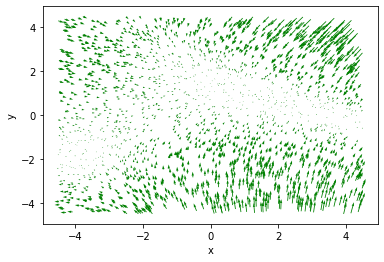

In [14]:
# approximate vector field and data points
V_next = Phi @ CT
X_next = V_next * dt + X0 # approximates X1
X1_ap_rbf = X_next # just renaming

# plotting the vector field
plt.quiver(X0[:,0],X0[:,1],V_next[:,0],V_next[:,1], angles='xy', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
# calculate the mean squared error
MSE_RBF = np.mean(X1 - X1_ap_rbf)**2
print('MSE: %.18f'%(MSE_RBF))

MSE: 0.000000000000000006


In [16]:
print('MSE: %.18f'%(MSE_RBF))#L=100, eps=10000 #what looks phi like?

MSE: 0.000000000000000006


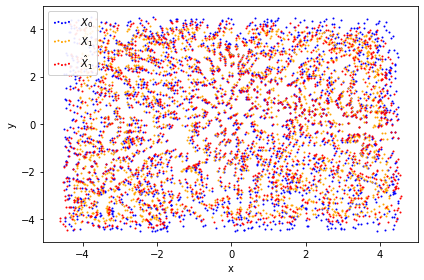

In [17]:
# compare exercise sheet about plotting vector field
# look at older exercise about implementation
# plot both data sets and approximated x1
plt.scatter(X0[:,0], X0[:,1], c='blue', s=1, alpha=1)
plt.scatter(X1[:,0], X1[:,1], c='orange', s=1, alpha=1)
plt.scatter(X1_ap_rbf[:,0], X1_ap_rbf[:,1], c='red', s=1, alpha=1)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.legend(['$X_0$','$X_1$', '$\hat{X}_1$'], loc='upper left', scatterpoints=5, framealpha=0.9)
plt.show()

In [18]:
print('Comparison of mean squared error:')
print('MSE with linear function: %.18f' %(MSE_lin))
print('MSE with nonlinear function (RBF): %.18f' %(MSE_RBF))
print('Difference of MSEs: %.18f' %(abs(MSE_lin - MSE_RBF)))

Comparison of mean squared error:
MSE with linear function: 0.000119949411095183
MSE with nonlinear function (RBF): 0.000000000000000006
Difference of MSEs: 0.000119949411095177


### Third part: solve the system

In [19]:
# store the solutions for each timestep starting with the already calculated X1
X_sol_rbf = [X1_ap_rbf]
# loop for a desired amount of timesteps - here 10 are enough for "good-enough" convergence (more takes very long)
for _ in range(10):
    #calculate phi for latest X
    Phi = rbf(X_sol_rbf[-1], L, eps)
    #calculate next V and X
    V_next = Phi @ CT
    X_next = V_next * dt + X_sol_rbf[-1]
    #append to solution vector
    X_sol_rbf.append(X_next)

#convert to numpy array for plotting
X_sol_rbf = np.array(X_sol_rbf)

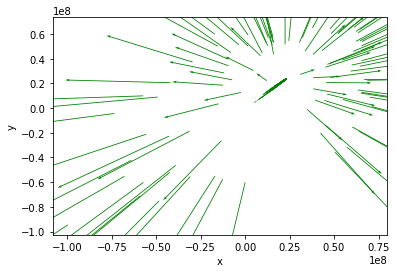

In [20]:
# plotting the vector field
plt.quiver(X_sol_rbf[-1,:,0],X_sol_rbf[-1,:,1],V_next[:,0],V_next[:,1], angles='xy', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

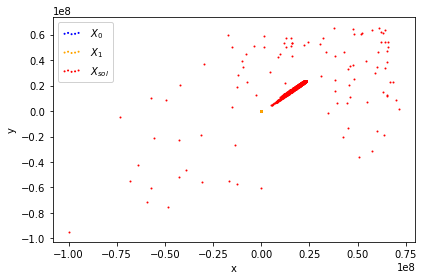

In [21]:
# plot both data sets and approximated x_sol
plt.scatter(X0[:,0], X0[:,1], c='blue', s=1, alpha=1)
plt.scatter(X1[:,0], X1[:,1], c='orange', s=1, alpha=1)
plt.scatter(X_sol_rbf[-1,:,0], X_sol_rbf[-1,:,1], c='red', s=1, alpha=1)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.legend(['$X_0$','$X_1$', '$X_{sol}$'], loc='upper left', scatterpoints=5, framealpha=0.9)
plt.show()

In [22]:
# these last two cells solve the system based on a linear approximation of the vector field
# store the solutions for each timestep starting with the already calculated X1
X_sol_lin = [X1_ap_lin]
# loop for a desired amount of timesteps
for _ in range(1000):
    #calculate next V and X
    V_next = X_sol_lin[-1] @ AT
    X_next = V_next * dt + X_sol_lin[-1]
    #append to solution vector
    X_sol_lin.append(X_next)
    
#convert to numpy array for plotting
X_sol_lin = np.array(X_sol_lin)

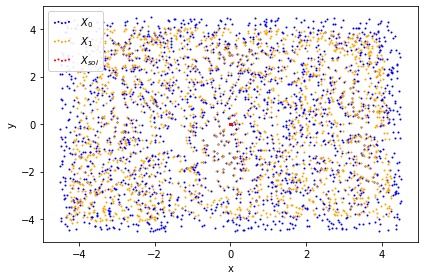

In [23]:
# plot both data sets and approximated x1
plt.scatter(X0[:,0], X0[:,1], c='blue', s=1, alpha=1)
plt.scatter(X1[:,0], X1[:,1], c='orange', s=1, alpha=1)
plt.scatter(X_sol_lin[-1,:,0], X_sol_lin[-1,:,1], c='red', s=1, alpha=1)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.legend(['$X_0$','$X_1$', '$X_{sol}$'], loc='upper left', scatterpoints=5, framealpha=0.9)
plt.show()